# Merging and exporting data

# 01. Importing libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [3]:
path=r'C:\Users\61491\12-2020 Instacart Basket Analysis'

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_merged.pkl'))

In [5]:
# Create a Subset
df = df_ords_prods_merge[:1000000]

In [6]:
df.shape

(1000000, 14)

In [7]:
# Define your price_label function 
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [8]:
# Apply the function
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\61491\AppData\Local\Temp\ipykernel_9228\902492192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [9]:
df['price_range'].value_counts(dropna=False)

Mid-range product    674729
Low-range product    312362
High range            12909
Name: price_range, dtype: int64

In [10]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

C:\Users\61491\AppData\Local\Temp\ipykernel_9228\2202711236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'


In [11]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [12]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [13]:
df['price_range_loc'].value_counts(dropna=False)

Mid-range product     674729
Low-range product     312362
High-range product     12909
Name: price_range_loc, dtype: int64

In [14]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [15]:
df_ords_prods_merge.loc[(df_ords_prods_merge['prices'] <= 15) & (df_ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [16]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [17]:
df_ords_prods_merge['price_range_loc'].value_counts(dropna=False)

Mid-range product     706328
Low-range product     327804
High-range product     13526
Name: price_range_loc, dtype: int64

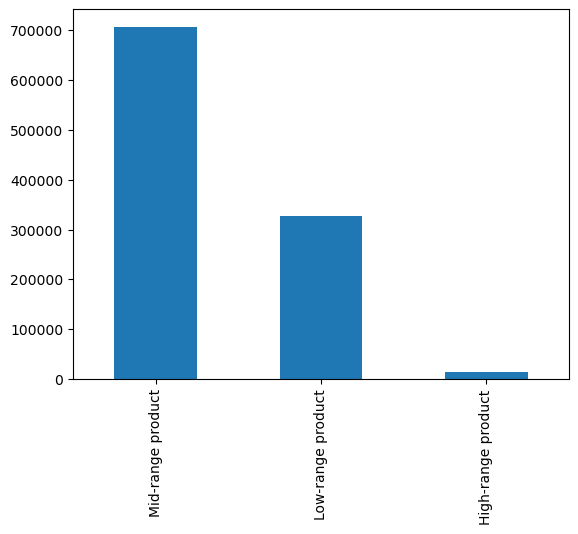

In [18]:
# Create a bar chart from the “loyalty_flag” column.
bar = df_ords_prods_merge['price_range_loc'].value_counts().plot.bar()

A price range column was created which stipulates that: If  price less than or equal to 5, then low-range product,If price between 5 and 15, then mid-range product, If pricegreater than 15, then high-range product. 
The mid-range priced products were the most ordered

In [39]:
# Export
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loc.png'))

In [19]:
# Which day do most orders take place.
df_ords_prods_merge['orders_day_of_week'].value_counts(dropna=False)

0    200009
1    182397
6    146437
2    138003
5    135421
3    123982
4    121409
Name: orders_day_of_week, dtype: int64

0 means Saturday: Thus Saturday is the busiest day. Meanwhile, the 4 value has the lowest frequency, meaning that Wednesday is the slowest day when it comes to Instacart app orders.

In [20]:
# Create column for  “Busiest day,” “Least busy,” and “Regularly busy.”
result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [21]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Least busy',
 'Busiest day',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 '

In [22]:
df_ords_prods_merge['Busiest_day'] = result

In [23]:
df_ords_prods_merge['Busiest_day'].value_counts(dropna=False)

Regularly busy    726240
Busiest day       200009
Least busy        121409
Name: Busiest_day, dtype: int64

The busiest day has a total of 200009 orders

## Task 4.7

In [24]:
df_ords_prods_merge.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_day
0,94891,4,4,5,13,15.0,22199,1,0,Extra-Dry Cava,134,5,8.9,both,Mid-range product,Regularly busy
1,31925,47329,4,3,10,12.0,22199,1,0,Extra-Dry Cava,134,5,8.9,both,Mid-range product,Regularly busy
2,94891,4,4,5,13,15.0,25146,2,0,Original Orange Juice,31,7,8.4,both,Mid-range product,Regularly busy
3,95113,410,2,1,18,7.0,25146,18,0,Original Orange Juice,31,7,8.4,both,Mid-range product,Regularly busy
4,109354,658,14,0,15,17.0,25146,22,0,Original Orange Juice,31,7,8.4,both,Mid-range product,Busiest day


In [25]:
# Which day do most orders take place.
df_ords_prods_merge['orders_day_of_week'].value_counts(dropna=False)

0    200009
1    182397
6    146437
2    138003
5    135421
3    123982
4    121409
Name: orders_day_of_week, dtype: int64

The busiest days are 0 = Saturday and 1 = Sunday; 
The slowest days are 3 = Tuesday and 4 = Wednesday

In [26]:
# Busiest Days
result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0 or value == 1:
    result.append("Busiest days")
  elif value == 3 or value == 4:
    result.append("Slowest days")
  else:
    result.append("Regularly busy")

In [27]:
result

['Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Slowest days',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest day

In [28]:
df_ords_prods_merge['Busiest_days'] = result

In [29]:
df_ords_prods_merge['Busiest_days'].value_counts(dropna=False)

Regularly busy    419861
Busiest days      382406
Slowest days      245391
Name: Busiest_days, dtype: int64

The 2 busiest days are Saturday and Sundays with 382406 orders

In [30]:
# Slowest Days
result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0 or value == 1:
    result.append("Busiest days")
  elif value == 3 or value == 4:
    result.append("Slowest days")
  else:
    result.append("Regularly busy")

In [31]:
df_ords_prods_merge['Slowest_days'] = result

In [32]:
df_ords_prods_merge['Slowest_days'].value_counts(dropna=False)

Regularly busy    419861
Busiest days      382406
Slowest days      245391
Name: Slowest_days, dtype: int64

The Slowest days are Tuesday and Wednesday with 245391 orders

In [33]:
# Which hour do most orders take place.
df_ords_prods_merge['order_hour_of_day'].value_counts(dropna=False)

10    88199
14    87387
11    87273
15    86068
12    85817
13    85436
16    80285
9     79881
17    68287
8     57235
18    53178
19    39611
20    31995
7     28912
21    25110
22    20622
23    13188
6      9804
0      6977
1      3999
5      2841
2      2319
3      1779
4      1455
Name: order_hour_of_day, dtype: int64

Most orders start from 10am to 15pm while Fewest orders are at midnight up to 5am.

In [34]:
# Busiest_period_of_day
result = []

for value in df_ords_prods_merge["order_hour_of_day"]:
  if value == 10 or value == 14 or value == 11 or value == 15 or value == 12 or value == 13:
    result.append("Most orders")
  elif value == 4 or value == 3 or value == 2 or value == 5 or value == 1 or value == 0:
    result.append("Fewest orders")
  else:
    result.append("Average orders")
    

In [35]:
result

['Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most ord

In [36]:
df_ords_prods_merge['Busiest_period_of_day'] = result

In [37]:
# Frequency
df_ords_prods_merge['Busiest_period_of_day'].value_counts(dropna=False)

Most orders       520180
Average orders    508108
Fewest orders      19370
Name: Busiest_period_of_day, dtype: int64

The busiest period of the day is between 10am and 15pm while Fewest orders are at midnight up to 5am.

## Export dataframe  

In [38]:
# Export as pkl
df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_update.pkl'))